# Estudo sobre Predição de Risco de Diabetes

## 1. Sobre o Projeto

Neste projeto, buscamos pesquisar e entender os padrões de risco de diabetes e a construção de algoritmos capazes de predizer o risco de diabetes baseado em características médicas e de estilo de vida dos pacientes.

Para isso, utilizamos uma base de dados sintética de saúde com informações sobre idade, BMI, níveis de glicose, atividade física, histórico familiar e hábitos de fumo.


### Descrição do Dataset

Esta base de dados sintética possui 12.000 registros que simulam perfis médicos e de estilo de vida individuais, com os seguintes atributos:

- **age**: Idade da pessoa (entre 20 e 80 anos)
- **bmi**: Índice de Massa Corporal (distribuição normal, entre 15 e 45)
- **glucose_level**: Nível de glicose no sangue (varia de 60 a 200)
- **physical_activity_level**: Nível de atividade física ('low', 'moderate', 'high')
- **family_history**: Binário (1 = sim, 0 = não) - Indica se há diabetes na família
- **smoker**: Binário (1 = sim, 0 = não) - Se a pessoa é fumante
- **at_risk_diabetes**: Variável alvo binária (1 = alto risco, 0 = baixo risco)

O risco é calculado usando um modelo baseado em regras que pondera fatores como BMI alto, glicose elevada, idade avançada, histórico familiar, fumo e baixa atividade física.


## 1.1 Metodologia

Como nosso objetivo principal é chegar a uma predição de risco de diabetes baseado em características médicas e de estilo de vida, iremos estabelecer algumas regras para execução desse estudo.

Para nos auxiliar com o estudo, iremos focar nas propriedades: idade, BMI, nível de glicose, nível de atividade física, histórico familiar e hábito de fumar.


## 1.2 Algoritmos Utilizados

Para auxiliar na predição do nosso modelo, utilizaremos três algoritmos de classificação diferentes:

- **K-Nearest Neighbors (KNN)**: Algoritmo baseado em proximidade que classifica baseado nos vizinhos mais próximos
- **Árvore de Decisão**: Algoritmo que cria uma estrutura de decisão em árvore para classificação
- **Random Forest**: Ensemble de árvores de decisão que combina múltiplas árvores para melhor precisão

Isso será importante para comparar diferentes abordagens de classificação e escolher o melhor modelo para nossos dados médicos.


# 2. Algoritmo do projeto

### Variáveis globais

In [47]:
DATASET_PATH = "./dataset/diabetes_risk_dataset.csv"

## 2.1 Importação de bibliotecas

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

## 2.2 Carregamento da base de dados

In [49]:
df = pd.read_csv(DATASET_PATH)

print(f"Total de registros: {len(df)}")
print(f"Shape do dataset: {df.shape}")
print(f"Distribuição da variável alvo:")
print(df['at_risk_diabetes'].value_counts())
print(f"\nFaixa etária: {df['age'].min()} - {df['age'].max()} anos")
print(f"Faixa de BMI: {df['bmi'].min():.2f} - {df['bmi'].max():.2f}")
print(f"Faixa de glicose: {df['glucose_level'].min():.2f} - {df['glucose_level'].max():.2f}")

df.head()

Total de registros: 100000
Shape do dataset: (100000, 7)
Distribuição da variável alvo:
at_risk_diabetes
0    79269
1    20731
Name: count, dtype: int64

Faixa etária: 20 - 79 anos
Faixa de BMI: 15.00 - 45.00
Faixa de glicose: 60.00 - 200.00


age        bmi  glucose_level physical_activity_level  family_history  \
0   58  33.154816      71.049867                     low               0   
1   71  26.786882     125.964887                     low               0   
2   48  20.977319      61.876196                moderate               1   
3   34  27.959924     137.648074                     low               0   
4   62  28.304175      65.879564                moderate               0   

   smoker  at_risk_diabetes  
0       0                 1  
1       0                 0  
2       1                 0  
3       0                 0  
4       0                 0

## 2.3 Informações sobre os dados

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  int64  
 1   bmi                      100000 non-null  float64
 2   glucose_level            100000 non-null  float64
 3   physical_activity_level  100000 non-null  object 
 4   family_history           100000 non-null  int64  
 5   smoker                   100000 non-null  int64  
 6   at_risk_diabetes         100000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 5.3+ MB


In [51]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

age: 60 valores únicos
bmi: 99195 valores únicos
glucose_level: 90908 valores únicos
physical_activity_level: 3 valores únicos
family_history: 2 valores únicos
smoker: 2 valores únicos
at_risk_diabetes: 2 valores únicos


# 3. Análise Exploratória dos Dados

## 3.1 Distribuição dos atributos

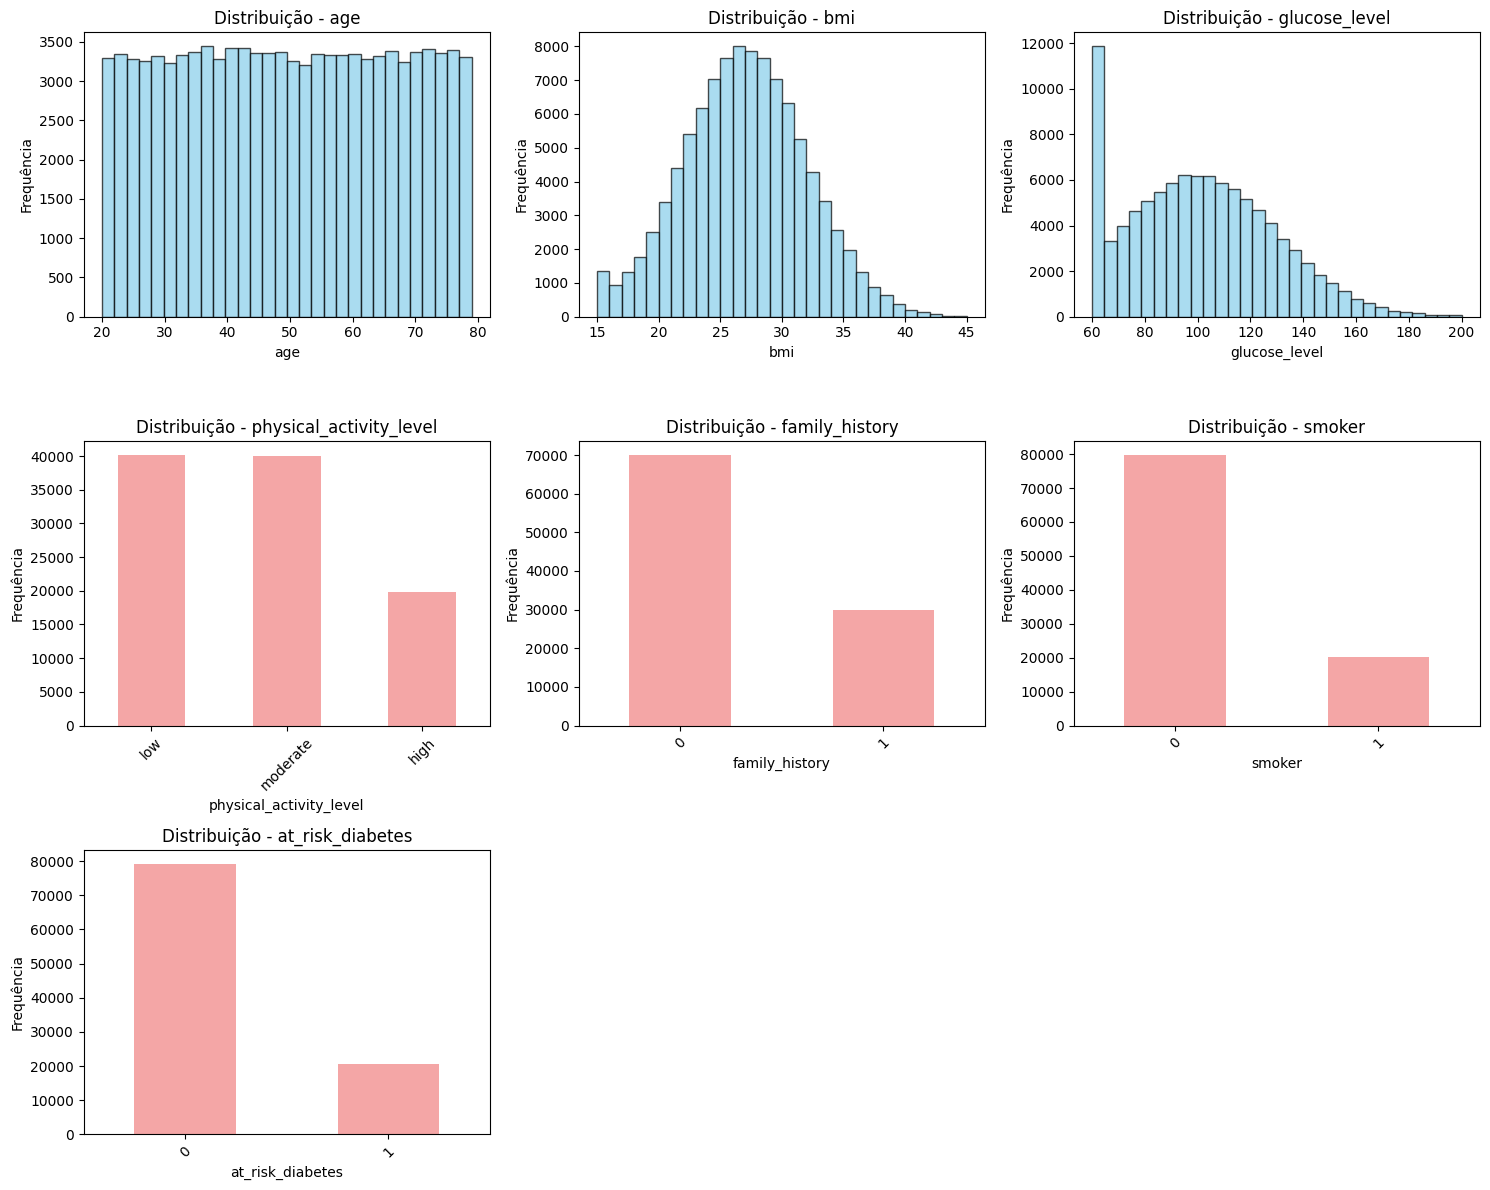

In [52]:
plt.figure(figsize=(15, 12))

numeric_cols = ['age', 'bmi', 'glucose_level']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    plt.title(f'Distribuição - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

categorical_cols = ['physical_activity_level', 'family_history', 'smoker', 'at_risk_diabetes']
for i, col in enumerate(categorical_cols, 4):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar', alpha=0.7, color='lightcoral')
    plt.title(f'Distribuição - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 3.2 Análise de correlação

Text(0.5, 1.0, 'Matriz de Correlação')

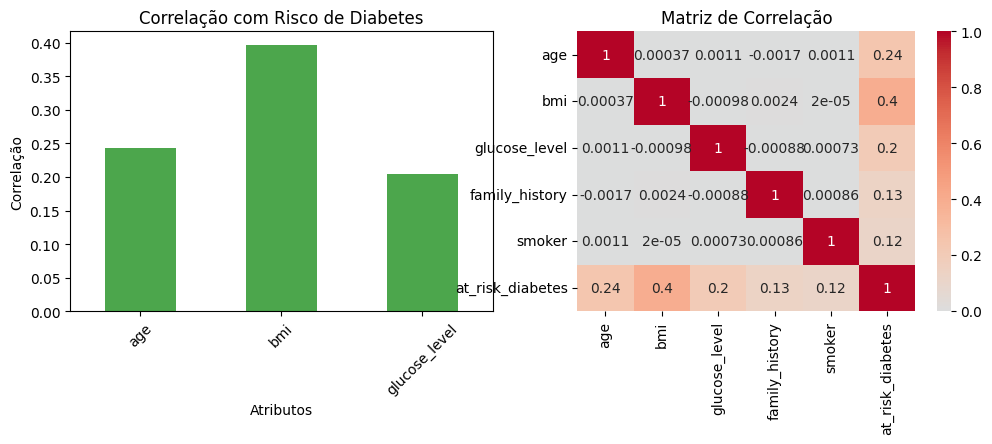

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
correlation_data = df[numeric_cols + ['at_risk_diabetes']].corr()['at_risk_diabetes'][:-1]
correlation_data.plot(kind='bar', alpha=0.7, color='green')
plt.title('Correlação com Risco de Diabetes')
plt.xlabel('Atributos')
plt.ylabel('Correlação')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.heatmap(df[numeric_cols + ['family_history', 'smoker', 'at_risk_diabetes']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')


## 3.3 Análise detalhada por grupos

In [54]:
print("Análise dos Grupos de Risco:")
risk_groups = df.groupby('at_risk_diabetes')

for risk_level, group in risk_groups:
    risk_label = 'Alto Risco' if risk_level == 1 else 'Baixo Risco'
    print(f"\n{risk_label} (n={len(group)}):")
    print(f"  Idade média: {group['age'].mean():.1f} anos")
    print(f"  BMI médio: {group['bmi'].mean():.2f}")
    print(f"  Glicose média: {group['glucose_level'].mean():.2f}")
    print(f"  Histórico familiar: {group['family_history'].sum()} ({group['family_history'].mean()*100:.1f}%)")
    print(f"  Fumantes: {group['smoker'].sum()} ({group['smoker'].mean()*100:.1f}%)")
    print("  Atividade física:")
    activity_dist = group['physical_activity_level'].value_counts()
    for activity, count in activity_dist.items():
        print(f"    {activity}: {count} ({count/len(group)*100:.1f}%)")

Análise dos Grupos de Risco:

Baixo Risco (n=79269):
  Idade média: 47.4 anos
  BMI médio: 26.03
  Glicose média: 98.40
  Histórico familiar: 21325 (26.9%)
  Fumantes: 14131 (17.8%)
  Atividade física:
    moderate: 32253 (40.7%)
    low: 30112 (38.0%)
    high: 16904 (21.3%)

Alto Risco (n=20731):
  Idade média: 57.8 anos
  BMI médio: 30.88
  Glicose média: 112.28
  Histórico familiar: 8607 (41.5%)
  Fumantes: 6069 (29.3%)
  Atividade física:
    low: 10075 (48.6%)
    moderate: 7733 (37.3%)
    high: 2923 (14.1%)


# 4. Pré-processamento dos Dados

## 4.1 Tratamento de variáveis categóricas

In [55]:
le = LabelEncoder()
df['physical_activity_level_encoded'] = le.fit_transform(df['physical_activity_level'])

activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapeamento de atividade física:")
for activity, code in activity_mapping.items():
    print(f"  {activity}: {code}")

feature_columns = ['age', 'bmi', 'glucose_level', 'physical_activity_level_encoded', 'family_history', 'smoker']
X = df[feature_columns]
y = df['at_risk_diabetes']

print(f"\nShape das features (X): {X.shape}")
print(f"Shape do target (y): {y.shape}")
print(f"Distribuição do target: {y.value_counts().to_dict()}")

X.head()

Mapeamento de atividade física:
  high: 0
  low: 1
  moderate: 2

Shape das features (X): (100000, 6)
Shape do target (y): (100000,)
Distribuição do target: {0: 79269, 1: 20731}


age        bmi  glucose_level  physical_activity_level_encoded  \
0   58  33.154816      71.049867                                1   
1   71  26.786882     125.964887                                1   
2   48  20.977319      61.876196                                2   
3   34  27.959924     137.648074                                1   
4   62  28.304175      65.879564                                2   

   family_history  smoker  
0               0       0  
1               0       0  
2               1       1  
3               0       0  
4               0       0

## 4.2 Divisão treino/teste

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho do dataset completo: {len(df)}")
print(f"Tamanho do conjunto de treinamento: {len(X_train)} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tamanho do conjunto de teste: {len(X_test)} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nDistribuição de classes no conjunto de treinamento:")
print(y_train.value_counts())
print(f"\nDistribuição de classes no conjunto de teste:")
print(y_test.value_counts())

Tamanho do dataset completo: 100000
Tamanho do conjunto de treinamento: 70000 (70.0%)
Tamanho do conjunto de teste: 30000 (30.0%)

Distribuição de classes no conjunto de treinamento:
at_risk_diabetes
0    55488
1    14512
Name: count, dtype: int64

Distribuição de classes no conjunto de teste:
at_risk_diabetes
0    23781
1     6219
Name: count, dtype: int64


# 5. Implementação dos Algoritmos de Classificação

## 5.1 K-Nearest Neighbors (KNN)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

knn_predictions = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN - Acurácia: {knn_accuracy:.4f}")
print(f"KNN - Relatório de Classificação:")
print(classification_report(y_test, knn_predictions, target_names=['Baixo Risco', 'Alto Risco']))

KNN - Acurácia: 0.8978
KNN - Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.93      0.95      0.94     23781
  Alto Risco       0.77      0.72      0.74      6219

    accuracy                           0.90     30000
   macro avg       0.85      0.83      0.84     30000
weighted avg       0.90      0.90      0.90     30000



## 5.2 Árvore de Decisão

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) # Limitando a arvore para 5 camadas 
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Decision Tree - Acurácia: {dt_accuracy:.4f}")
print(f"Decision Tree - Relatório de Classificação:")
print(classification_report(y_test, dt_predictions, target_names=['Baixo Risco', 'Alto Risco']))

Decision Tree - Acurácia: 0.8777
Decision Tree - Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.92      0.92      0.92     23781
  Alto Risco       0.70      0.71      0.71      6219

    accuracy                           0.88     30000
   macro avg       0.81      0.82      0.82     30000
weighted avg       0.88      0.88      0.88     30000



## 5.3 Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5) # Mantendo 5 para parametrizar com a Arvore de decisão
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest - Acurácia: {rf_accuracy:.4f}")
print(f"Random Forest - Relatório de Classificação:")
print(classification_report(y_test, rf_predictions, target_names=['Baixo Risco', 'Alto Risco']))

Random Forest - Acurácia: 0.9114
Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

 Baixo Risco       0.94      0.95      0.94     23781
  Alto Risco       0.81      0.75      0.78      6219

    accuracy                           0.91     30000
   macro avg       0.87      0.85      0.86     30000
weighted avg       0.91      0.91      0.91     30000



# 6. Comparação e Avaliação dos Modelos

## 6.1 Comparação de performance

Melhor modelo: Random Forest com acurácia de 0.9114


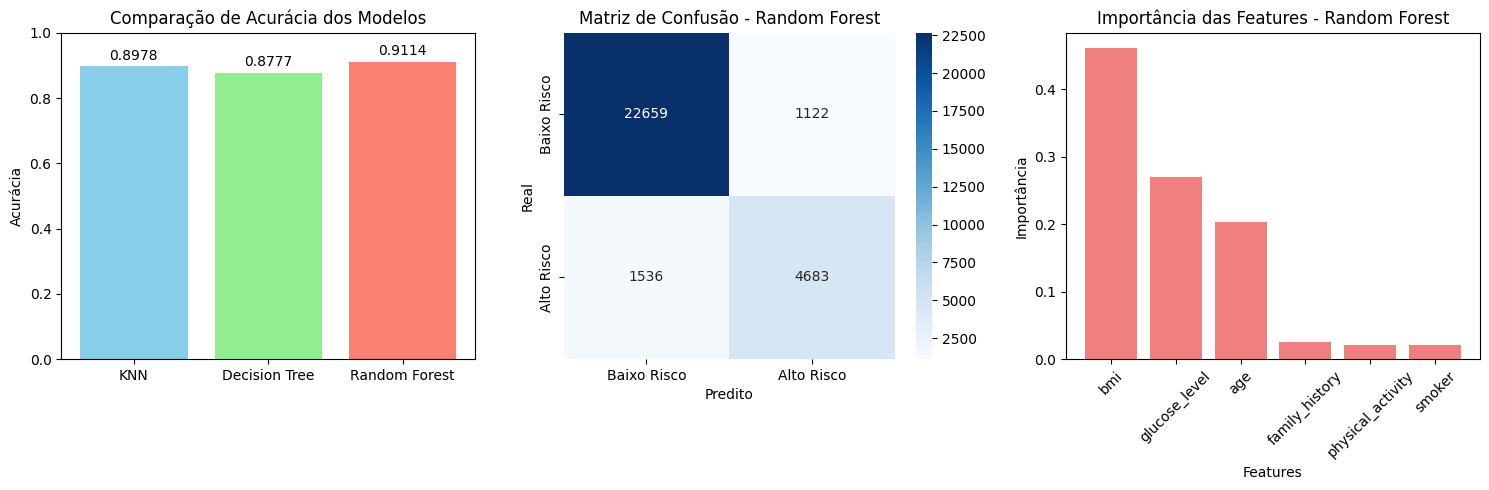


Importância das Features (Random Forest):
bmi                      : 0.4606
glucose_level            : 0.2697
age                      : 0.2031
family_history           : 0.0254
physical_activity        : 0.0207
smoker                   : 0.0205


In [60]:
models_results = {
    'KNN': {'accuracy': knn_accuracy, 'predictions': knn_predictions},
    'Decision Tree': {'accuracy': dt_accuracy, 'predictions': dt_predictions},
    'Random Forest': {'accuracy': rf_accuracy, 'predictions': rf_predictions}
}

# Gráfico de comparação de acurácia
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
models = list(models_results.keys())
accuracies = [models_results[model]['accuracy'] for model in models]

bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.4f}', ha='center', va='bottom')

best_model_name = max(models_results.keys(), key=lambda x: models_results[x]['accuracy'])
best_predictions = models_results[best_model_name]['predictions']

print(f"Melhor modelo: {best_model_name} com acurácia de {models_results[best_model_name]['accuracy']:.4f}")

plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Baixo Risco', 'Alto Risco'],
            yticklabels=['Baixo Risco', 'Alto Risco'])
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.xlabel('Predito')
plt.ylabel('Real')

plt.subplot(1, 3, 3)
feature_importance = rf_model.feature_importances_
feature_names = ['age', 'bmi', 'glucose_level', 'physical_activity', 'family_history', 'smoker']

indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(feature_importance)), feature_importance[indices], color='lightcoral')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importância')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)

plt.tight_layout()
plt.show()

print(f"\nImportância das Features (Random Forest):")
for i in indices:
    print(f"{feature_names[i]:25}: {feature_importance[i]:.4f}")

## 6.2 Visualização da Árvore de Decisão

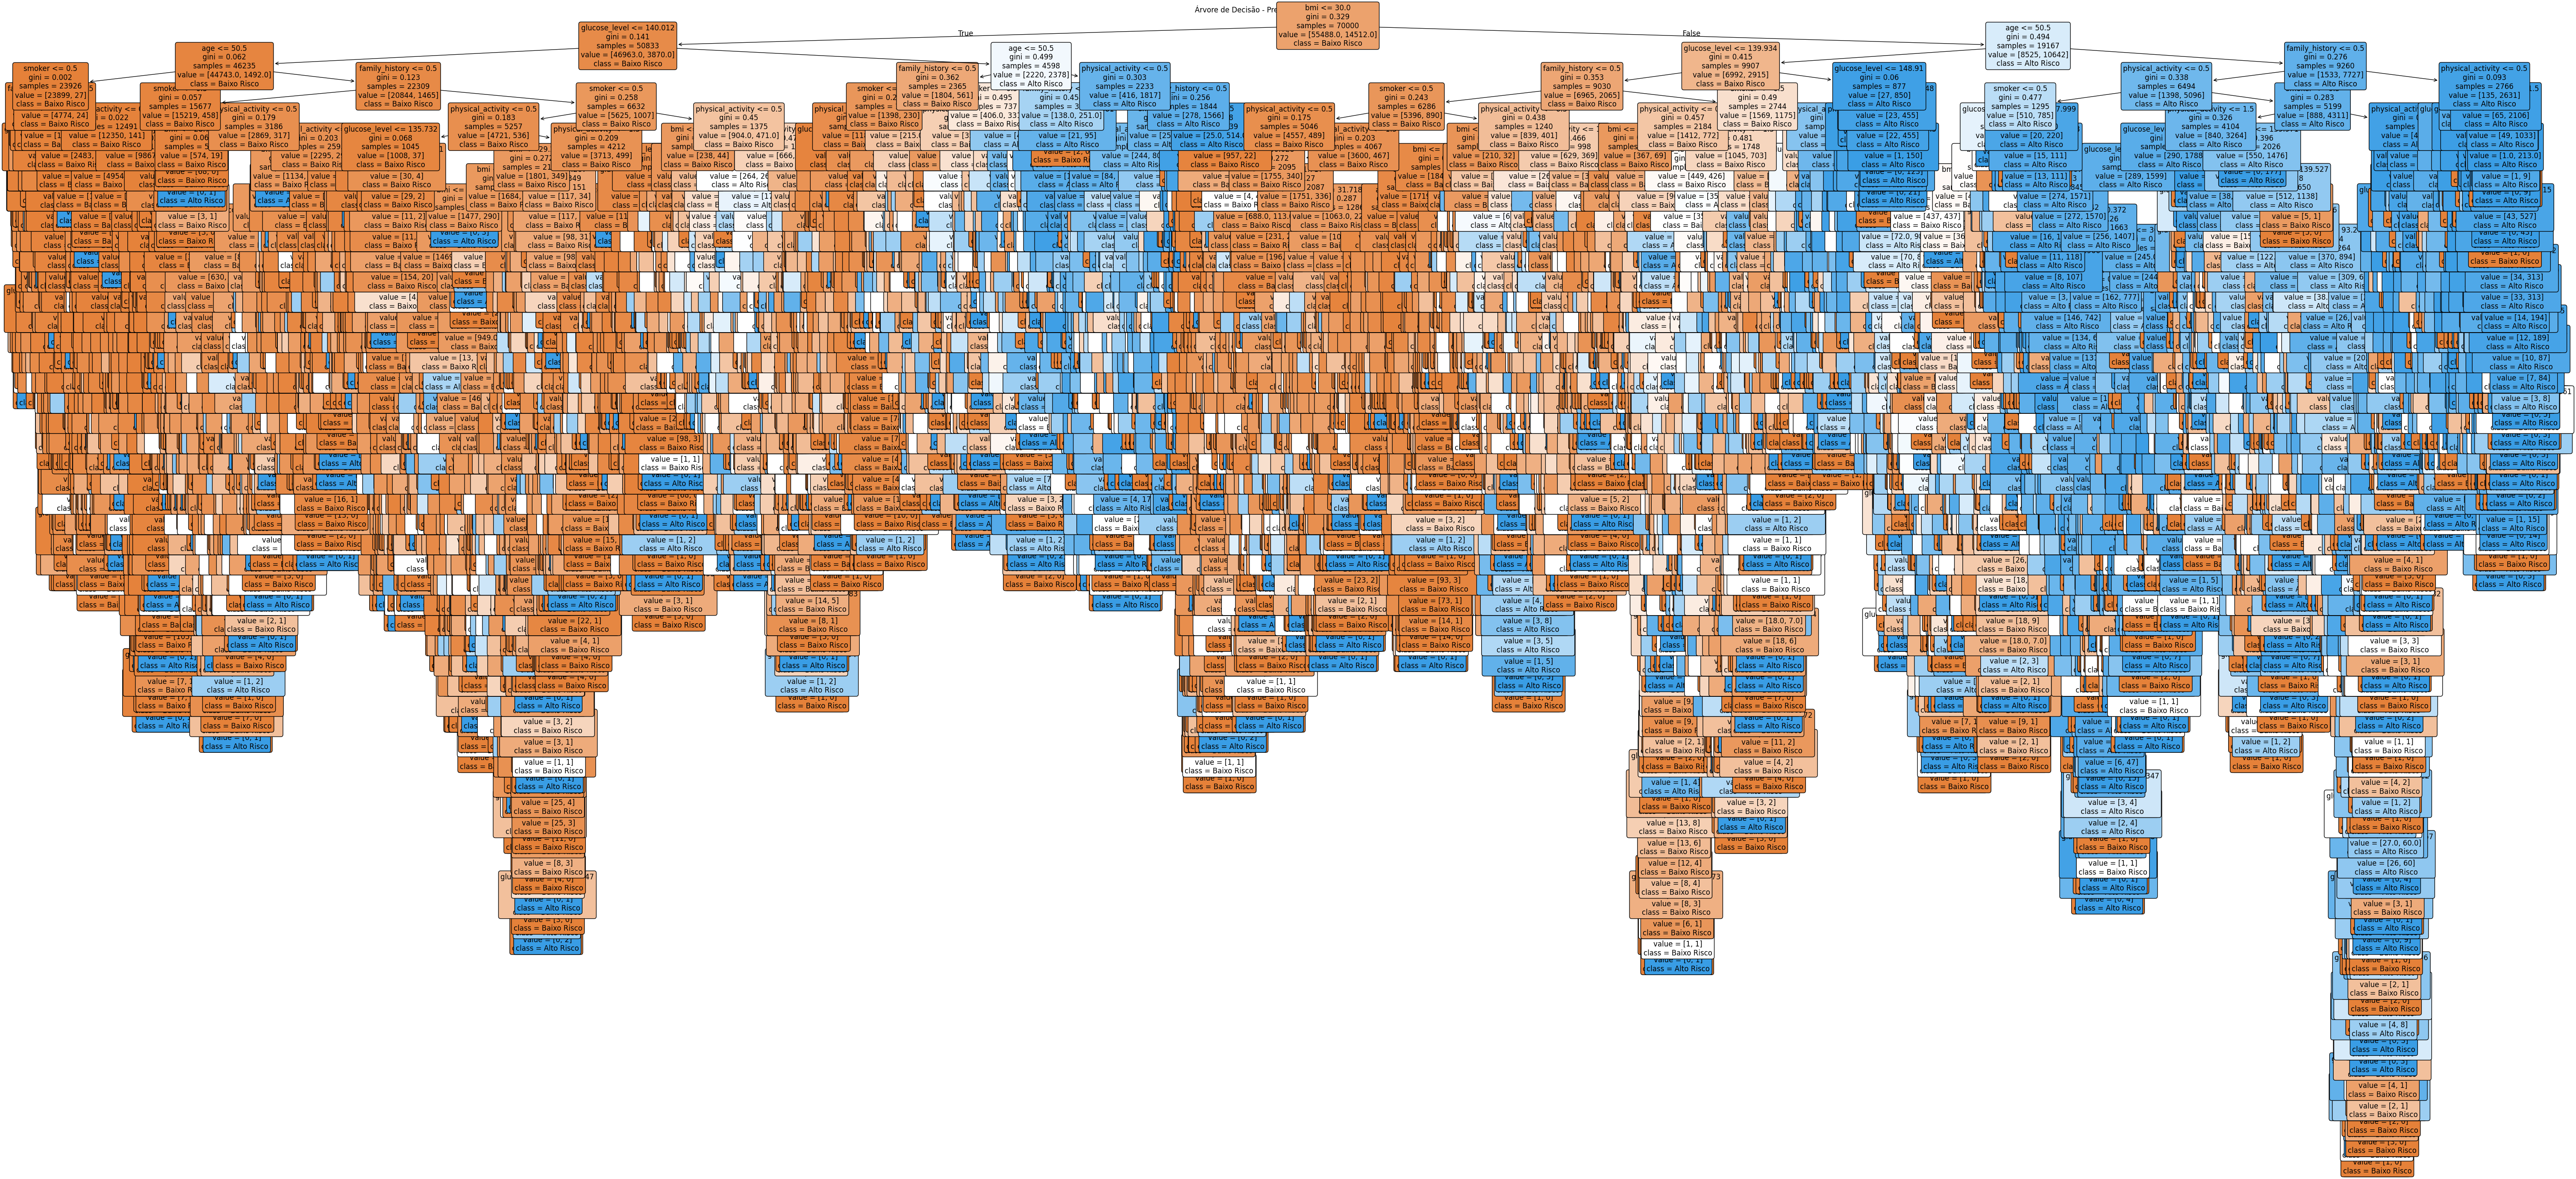

In [61]:
# Árvore de Decisão simplificada
plt.figure(figsize=(75, 35))
plot_tree(dt_model, 
          feature_names=feature_names,
          class_names=['Baixo Risco', 'Alto Risco'],
          filled=True, rounded=True, fontsize=12)
plt.title('Árvore de Decisão - Predição de Risco de Diabetes')
plt.show()

## 6.3 Matrizes de Confusão Detalhadas

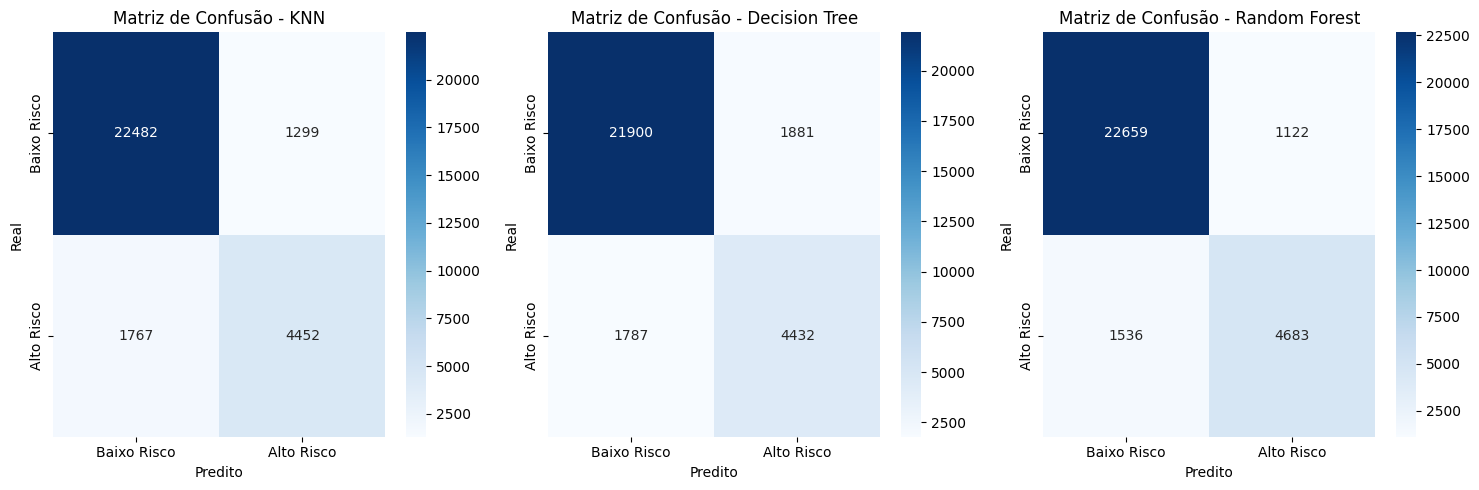

In [62]:
plt.figure(figsize=(15, 5))

models_list = ['KNN', 'Decision Tree', 'Random Forest']
predictions_list = [knn_predictions, dt_predictions, rf_predictions]

for i, (model_name, predictions) in enumerate(zip(models_list, predictions_list)):
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Baixo Risco', 'Alto Risco'],
                yticklabels=['Baixo Risco', 'Alto Risco'])
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')

plt.tight_layout()
plt.show()

# 7. Função de Predição e Exemplo Prático

## 7.1 Função para predição de novos casos

In [63]:
def predict_diabetes_risk(age, bmi, glucose_level, physical_activity, family_history, smoker, model_name='Random Forest'):    
    activity_mapping = {'low': 0, 'moderate': 1, 'high': 2}
    activity_encoded = activity_mapping.get(physical_activity.lower(), 0)
    
    new_data = np.array([[age, bmi, glucose_level, activity_encoded, family_history, smoker]])
    
    if model_name == 'KNN':
        new_data_scaled = scaler.transform(new_data)
        model = knn_model
        prediction = model.predict(new_data_scaled)[0]
        probability = model.predict_proba(new_data_scaled)[0]
    elif model_name == 'Decision Tree':
        model = dt_model
        prediction = model.predict(new_data)[0]
        probability = model.predict_proba(new_data)[0]
    else:  # Random Forest
        model = rf_model
        prediction = model.predict(new_data)[0]
        probability = model.predict_proba(new_data)[0]
    
    risk_label = 'ALTO RISCO' if prediction == 1 else 'BAIXO RISCO'
    risk_probability = probability[1]
    
    print(f"\n{'='*50}")
    print(f"PREDIÇÃO DE RISCO DE DIABETES - {model_name}")
    print('='*50)
    print(f"Dados do paciente:")
    print(f"  Idade: {age} anos")
    print(f"  BMI: {bmi}")
    print(f"  Nível de glicose: {glucose_level}")
    print(f"  Atividade física: {physical_activity}")
    print(f"  Histórico familiar: {'Sim' if family_history == 1 else 'Não'}")
    print(f"  Fumante: {'Sim' if smoker == 1 else 'Não'}")
    print(f"\nResultado da predição:")
    print(f"  Classificação: {risk_label}")
    print(f"  Probabilidade de alto risco: {risk_probability:.1%}")
    
    return prediction, risk_probability

## 7.2 Exemplos de predição

In [64]:
print("\nPaciente com perfil de alto risco")
predict_diabetes_risk(58, 33.15, 71.05, 'low', 0, 0, 'Random Forest')

print("\nPaciente com perfil de baixo risco")
predict_diabetes_risk(25, 22.0, 85.0, 'high', 0, 0, 'Random Forest')

print("\nEXEMPLO 3: Paciente com fatores de risco mistos")
predict_diabetes_risk(45, 28.5, 110.0, 'moderate', 1, 1, 'Random Forest')


Paciente com perfil de alto risco

PREDIÇÃO DE RISCO DE DIABETES - Random Forest
Dados do paciente:
  Idade: 58 anos
  BMI: 33.15
  Nível de glicose: 71.05
  Atividade física: low
  Histórico familiar: Não
  Fumante: Não

Resultado da predição:
  Classificação: ALTO RISCO
  Probabilidade de alto risco: 70.0%

Paciente com perfil de baixo risco

PREDIÇÃO DE RISCO DE DIABETES - Random Forest
Dados do paciente:
  Idade: 25 anos
  BMI: 22.0
  Nível de glicose: 85.0
  Atividade física: high
  Histórico familiar: Não
  Fumante: Não

Resultado da predição:
  Classificação: BAIXO RISCO
  Probabilidade de alto risco: 0.0%

EXEMPLO 3: Paciente com fatores de risco mistos

PREDIÇÃO DE RISCO DE DIABETES - Random Forest
Dados do paciente:
  Idade: 45 anos
  BMI: 28.5
  Nível de glicose: 110.0
  Atividade física: moderate
  Histórico familiar: Sim
  Fumante: Sim

Resultado da predição:
  Classificação: BAIXO RISCO
  Probabilidade de alto risco: 0.0%


(np.int64(0), np.float64(0.0))

In [65]:
print("\nCOMPARAÇÃO ENTRE MODELOS (mesmo paciente):")
test_case = (45, 28.5, 110.0, 'moderate', 1, 1)

for model in ['KNN', 'Decision Tree', 'Random Forest']:
    predict_diabetes_risk(*test_case, model)


COMPARAÇÃO ENTRE MODELOS (mesmo paciente):

PREDIÇÃO DE RISCO DE DIABETES - KNN
Dados do paciente:
  Idade: 45 anos
  BMI: 28.5
  Nível de glicose: 110.0
  Atividade física: moderate
  Histórico familiar: Sim
  Fumante: Sim

Resultado da predição:
  Classificação: BAIXO RISCO
  Probabilidade de alto risco: 0.0%

PREDIÇÃO DE RISCO DE DIABETES - Decision Tree
Dados do paciente:
  Idade: 45 anos
  BMI: 28.5
  Nível de glicose: 110.0
  Atividade física: moderate
  Histórico familiar: Sim
  Fumante: Sim

Resultado da predição:
  Classificação: BAIXO RISCO
  Probabilidade de alto risco: 0.0%

PREDIÇÃO DE RISCO DE DIABETES - Random Forest
Dados do paciente:
  Idade: 45 anos
  BMI: 28.5
  Nível de glicose: 110.0
  Atividade física: moderate
  Histórico familiar: Sim
  Fumante: Sim

Resultado da predição:
  Classificação: BAIXO RISCO
  Probabilidade de alto risco: 0.0%


# 8. Análise e Conclusões

## 8.1 Resumo dos resultados

In [66]:

print(f"Dataset: {len(df)} registros")
print(f"Features utilizadas: {len(feature_names)}")
print(f"Divisão: {len(X_train)} treino / {len(X_test)} teste")

print(f"\nPerformance dos modelos:")
for model, results in models_results.items():
    accuracy = results['accuracy']
    print(f"  {model:15}: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nMelhor modelo: {best_model_name}")
print(f"Acurácia: {models_results[best_model_name]['accuracy']:.4f}")

print(f"\nFeatures mais importantes (Random Forest):")
top_features_idx = np.argsort(feature_importance)[-3:][::-1]
for i, idx in enumerate(top_features_idx, 1):
    print(f"  {i}. {feature_names[idx]}: {feature_importance[idx]:.4f}")

Dataset: 100000 registros
Features utilizadas: 6
Divisão: 70000 treino / 30000 teste

Performance dos modelos:
  KNN            : 0.8978 (89.78%)
  Decision Tree  : 0.8777 (87.77%)
  Random Forest  : 0.9114 (91.14%)

Melhor modelo: Random Forest
Acurácia: 0.9114

Features mais importantes (Random Forest):
  1. bmi: 0.4606
  2. glucose_level: 0.2697
  3. age: 0.2031


## 8.2 Insights médicos

In [67]:
important_features = [(feature_names[i], feature_importance[i]) for i in np.argsort(feature_importance)[::-1]]

for feature, importance in important_features:
    print(f"\n{feature} (importância: {importance:.3f}):")
    
    if feature == 'glucose_level':
        high_glucose = df[df['glucose_level'] > df['glucose_level'].quantile(0.75)]
        risk_rate = high_glucose['at_risk_diabetes'].mean()
        print(f"  - Pacientes com glicose alta (>75º percentil): {risk_rate:.1%} de risco")
    
    elif feature == 'bmi':
        high_bmi = df[df['bmi'] > 30]  # Obesidade
        risk_rate = high_bmi['at_risk_diabetes'].mean()
        print(f"  - Pacientes obesos (BMI > 30): {risk_rate:.1%} de risco")
    
    elif feature == 'age':
        older_patients = df[df['age'] > 60]
        risk_rate = older_patients['at_risk_diabetes'].mean()
        print(f"  - Pacientes acima de 60 anos: {risk_rate:.1%} de risco")
    
    elif feature == 'family_history':
        with_history = df[df['family_history'] == 1]
        risk_rate = with_history['at_risk_diabetes'].mean()
        print(f"  - Pacientes com histórico familiar: {risk_rate:.1%} de risco")
    
    elif feature == 'smoker':
        smokers = df[df['smoker'] == 1]
        risk_rate = smokers['at_risk_diabetes'].mean()
        print(f"  - Pacientes fumantes: {risk_rate:.1%} de risco")
    
    elif feature == 'physical_activity':
        low_activity = df[df['physical_activity_level'] == 'low']
        risk_rate = low_activity['at_risk_diabetes'].mean()
        print(f"  - Pacientes com baixa atividade física: {risk_rate:.1%} de risco")


bmi (importância: 0.461):
  - Pacientes obesos (BMI > 30): 55.5% de risco

glucose_level (importância: 0.270):
  - Pacientes com glicose alta (>75º percentil): 33.6% de risco

age (importância: 0.203):
  - Pacientes acima de 60 anos: 32.3% de risco

family_history (importância: 0.025):
  - Pacientes com histórico familiar: 28.8% de risco

physical_activity (importância: 0.021):
  - Pacientes com baixa atividade física: 25.1% de risco

smoker (importância: 0.021):
  - Pacientes fumantes: 30.0% de risco
